In [1]:
#importing necessary libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# 1: Connect (or create) the SQLite database  
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [ ]:
# 2: Create the sales table if it doesn't exist
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')


In [4]:
#3: Inserting sample data only if table is empty ---
cursor.execute("SELECT COUNT(*) FROM sales")
if cursor.fetchone()[0] == 0:
    sample_data = [
        ("Laptop", 5, 60000),
        ("Laptop", 3, 62000),
        ("Mouse", 20, 800),
        ("Keyboard", 10, 1500),
        ("Headphones", 7, 2500),
        ("Headphones", 5, 2300),
        ("Monitor", 4, 12000),
        ("Smartphone", 6, 30000),
        ("Smartphone", 4, 28000),
        ("Printer", 3, 8500),
        ("Tablet", 5, 20000),
        ("Tablet", 2, 18000),
        ("Speaker", 8, 3500),
        ("Webcam", 6, 2200),
        ("External Hard Drive", 4, 7000)
    ]
    cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
    conn.commit()

In [14]:
# 4: Run SQL query for sales summary  
query = '''
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
'''
df = pd.read_sql_query(query, conn)

In [15]:
# 5: Print summary results ---
print("Basic Sales Summary:\n")
print(df)

Basic Sales Summary:

                product  total_qty   revenue
0   External Hard Drive          4   28000.0
1            Headphones         12   29000.0
2              Keyboard         10   15000.0
3                Laptop          8  486000.0
4               Monitor          4   48000.0
5                 Mouse         20   16000.0
6               Printer          3   25500.0
7            Smartphone         10  292000.0
8               Speaker          8   28000.0
9                Tablet          7  136000.0
10               Webcam          6   13200.0


In [ ]:
#6: Save the summary as CSV file ---
df.to_csv("sales_summary.csv", index=False)
print("\n Sales summary saved as 'sales_summary.csv'")


✅ Sales summary saved as 'sales_summary.csv'


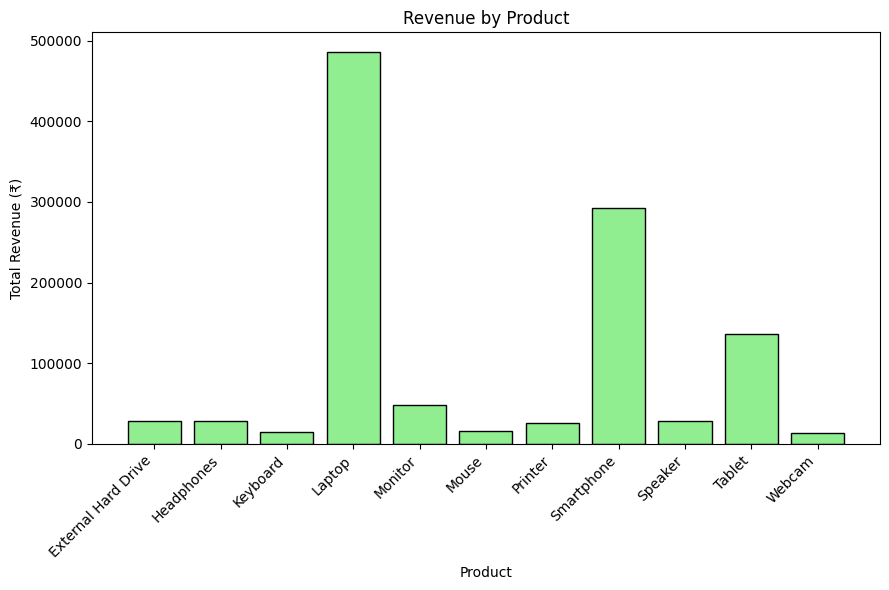

In [8]:
#7: Plot a simple bar chart for revenue per product ---
plt.figure(figsize=(9, 6))
plt.bar(df["product"], df["revenue"], color='lightgreen', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Product")
plt.ylabel("Total Revenue (₹)")
plt.title("Revenue by Product")
plt.tight_layout()

In [9]:
# Save the chart as PNG
plt.savefig("sales_chart.png")
print("Bar chart saved as 'sales_chart.png'")

Bar chart saved as 'sales_chart.png'


<Figure size 640x480 with 0 Axes>

In [10]:
# Show chart
plt.show()

In [ ]:
#8: Close the database connection  
conn.close()
